<a href="https://colab.research.google.com/github/fnbellomo/DiploDatos2021/blob/main/AyCu_Entregable_Parte_1_Agrupamiento_de_Suburb_%2B_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [167]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

sns.set_context('talk')
sns.set_style('darkgrid')
pd.set_option("display.max_columns", None)

In [168]:
def is_one_to_one(df, col1, col2):
    first = df.drop_duplicates([col1, col2]).groupby(col1)[col2].count().max()
    second = df.drop_duplicates([col1, col2]).groupby(col2)[col1].count().max()
    return first + second == 2

In [169]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    
    Thanks https://stackoverflow.com/questions/42877802/pandas-dataframe-join-items-in-range-based-on-their-geo-coordinates-longitude
    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

## Ejercicio 1: 

1. Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

In [170]:
melb_df = pd.read_csv(
    "https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv",
    parse_dates=["Date"]
)

# Transformamos las col cat 'type' y 'method' a numericas
melb_df["seller_cat"] = LabelEncoder().fit_transform(melb_df.SellerG)
melb_df["method_cat"] = LabelEncoder().fit_transform(melb_df.Method)
melb_df["type_cat"] = LabelEncoder().fit_transform(melb_df.Type)
melb_df["suburb_cat"] = LabelEncoder().fit_transform(melb_df.Suburb)
melb_df["region_name_cat"] = LabelEncoder().fit_transform(melb_df.Regionname)
melb_df["council_area_cat"] = LabelEncoder().fit_transform(melb_df.CouncilArea.fillna('NaN'))

# Ordeno un poco las columnas y unifico los nombres a snake_cases
melb_df = melb_df[[
    "Date",
    "SellerG",
    "Method",
    "Type",
    "Regionname",
    "Suburb",
    "CouncilArea",
    "Address",
    "seller_cat",
    "method_cat",
    "type_cat",
    "region_name_cat",
    "council_area_cat",
    "suburb_cat",
    "Postcode",
    "Lattitude",
    "Longtitude",
    "Distance",
    "Propertycount",
    "Price",
    "YearBuilt",
    "Landsize",
    "BuildingArea",
    "Rooms",
    "Bedroom2",
    "Bathroom",
    "Car",
]]

melb_df.columns = [
    "date",
    "seller",
    "method",
    "type",
    "region_name",
    "suburb",
    "council_area",
    "address",
    "seller_cat",
    "method_cat",
    "type_cat",
    "region_name_cat",
    "council_area_cat",
    "suburb_cat",
    "postcode",
    "lat",
    "lng",
    "distance",
    "property_count",
    "price",
    "year_built",
    "land_size",
    "building_area",
    "rooms",
    "bedroom_2",
    "bathroom",
    "car",
]

for col in ["postcode", "property_count", "bedroom_2", "bathroom"]:
    melb_df[col] = melb_df[col].astype(int)

melb_df.head()

,date,seller,method,type,region_name,suburb,council_area,address,seller_cat,method_cat,type_cat,region_name_cat,council_area_cat,suburb_cat,postcode,lat,lng,distance,property_count,price,year_built,land_size,building_area,rooms,bedroom_2,bathroom,car
0,2016-03-12,Biggin,S,h,Northern Metropolitan,Abbotsford,Yarra,85 Turner St,23,1,0,2,32,0,3067,-37.7996,144.9984,2.5,4019,1480000.0,NaN,202.0,NaN,2,2,1,1.0
1,2016-04-02,Biggin,S,h,Northern Metropolitan,Abbotsford,Yarra,25 Bloomburg St,23,1,0,2,32,0,3067,-37.8079,144.9934,2.5,4019,1035000.0,1900.0,156.0,79.0,2,2,1,0.0
2,2017-04-03,Biggin,SP,h,Northern Metropolitan,Abbotsford,Yarra,5 Charles St,23,3,0,2,32,0,3067,-37.8093,144.9944,2.5,4019,1465000.0,1900.0,134.0,150.0,3,3,2,0.0
3,2017-04-03,Biggin,PI,h,Northern Metropolitan,Abbotsford,Yarra,40 Federation La,23,0,0,2,32,0,3067,-37.7969,144.9969,2.5,4019,850000.0,NaN,94.0,NaN,3,3,2,1.0
4,2016-04-06,Nelson,VB,h,Northern Metropolitan,Abbotsford,Yarra,55a Park St,155,4,0,2,32,0,3067,-37.8072,144.9941,2.5,4019,1600000.0,2014.0,120.0,142.0,4,3,1,2.0


In [171]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              13580 non-null  datetime64[ns]
 1   seller            13580 non-null  object        
 2   method            13580 non-null  object        
 3   type              13580 non-null  object        
 4   region_name       13580 non-null  object        
 5   suburb            13580 non-null  object        
 6   council_area      12211 non-null  object        
 7   address           13580 non-null  object        
 8   seller_cat        13580 non-null  int64         
 9   method_cat        13580 non-null  int64         
 10  type_cat          13580 non-null  int64         
 11  region_name_cat   13580 non-null  int64         
 12  council_area_cat  13580 non-null  int64         
 13  suburb_cat        13580 non-null  int64         
 14  postcode          1358

In [172]:
melb_df.describe()

,seller_cat,method_cat,type_cat,region_name_cat,council_area_cat,suburb_cat,postcode,lat,lng,distance,property_count,price,year_built,land_size,building_area,rooms,bedroom_2,bathroom,car
count,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,1.358000e+04,8205.000000,13580.000000,7130.000000,13580.000000,13580.000000,13580.000000,13518.000000
mean,130.810972,1.407290,0.526362,3.766053,15.890280,155.307953,3105.301915,-37.809203,144.995216,10.137776,7454.417378,1.075684e+06,1964.684217,558.416127,151.967650,2.937997,2.914728,1.534242,1.610075
std,77.735927,1.119105,0.832878,2.024334,9.970486,90.307844,90.676964,0.079260,0.103916,5.868725,4378.581772,6.393107e+05,37.273762,3990.669241,541.014538,0.955748,0.965921,0.691712,0.962634
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3000.000000,-38.182550,144.431810,0.000000,249.000000,8.500000e+04,1196.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,73.000000,1.000000,0.000000,2.000000,6.000000,70.000000,3044.000000,-37.856822,144.929600,6.100000,4380.000000,6.500000e+05,1940.000000,177.000000,93.000000,2.000000,2.000000,1.000000,1.000000
50%,135.000000,1.000000,0.000000,5.000000,18.000000,154.000000,3084.000000,-37.802355,145.000100,9.200000,6555.000000,9.030000e+05,1970.000000,440.000000,126.000000,3.000000,3.000000,1.000000,2.000000
75%,194.000000,1.000000,1.000000,5.000000,24.000000,234.000000,3148.000000,-37.756400,145.058305,13.000000,10331.000000,1.330000e+06,1999.000000,651.000000,174.000000,3.000000,3.000000,2.000000,2.000000
max,267.000000,4.000000,2.000000,7.000000,33.000000,313.000000,3977.000000,-37.408530,145.526350,48.100000,21650.000000,9.000000e+06,2018.000000,433014.000000,44515.000000,10.000000,20.000000,8.000000,10.000000


In [173]:
# sns.pairplot(melb_df)

Eliminar valores extremos de:
    - year_built
    - land_size
    - building_area
    
En el precio tengo mis dudas si tenemos o no que eliminar valores 
Yo eliminaría muy pocos valores.... en el boxplot hay una línea de unos puntitos que quedan afuera como outliers a partir de aproximadamente los 4 millones, muy pocas casas (unas 30), que no parecen ser mansiones, pero por algún motivo fueron vendidas a precios increíbles.... nosé, tal vez están valuadas porque algo ocurrió ahí o porque algún famoso vivió ahí. Sacaría solamente esas 30 por las dudas que nos tire demasiado para arriba los valores de venta sin ninguna razón aparente más que, de nuevo, "famoso", "hecho fantástico", o algo así.
También podemos sacar los valores desde el 75% para arriba, que sería cerca a partir de los dos millones y pico, y nos sacamos de encima toda la hilera de puntitos. Eso serían cerca de unas 300 casas aprox....
Y por ahí también sacaría las casas con precios demasiado bajos, por los casos en que las propiedades hayan sido vendidas por debajo de su precio de venta (lo que quiere decir que estaban hechas percha)

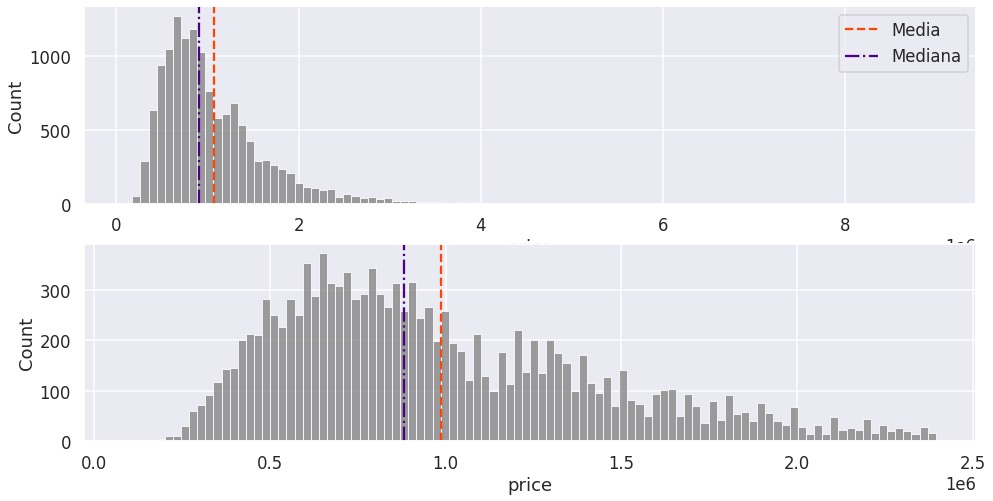

In [174]:
# Estos histogramas me dan algo de info visual, pero no me dicen mucho de los valores extremos...
import seaborn
fig, axes = plt.subplots(nrows=2, figsize=(16, 8))
seaborn.histplot(melb_df["price"], bins=100, ax=axes[0], color='gray')
axes[0].axvline(melb_df["price"].mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(melb_df["price"].median(), color='indigo',
            linestyle='-.', label='Mediana')

melb_filtered_df = melb_df[melb_df["price"] < 2.4e6]
seaborn.histplot(melb_filtered_df["price"], bins=100, ax=axes[1], color='gray')
axes[1].axvline(melb_filtered_df["price"].mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(melb_filtered_df["price"].median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[0].legend()

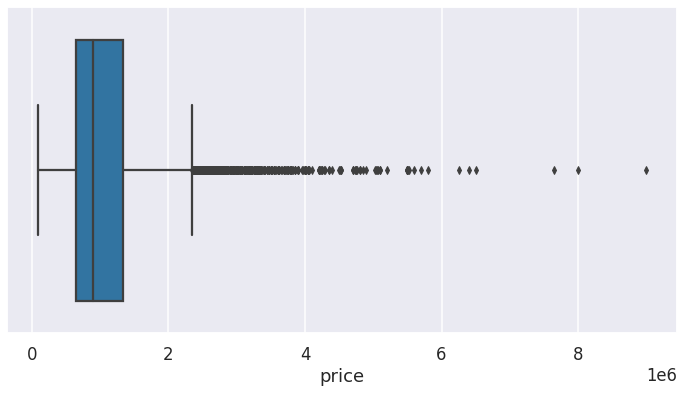

In [175]:
plt.figure(figsize=(12,6))
seaborn.boxplot(x=melb_df["price"])
# Acá se ven un poquito mejor los outliers, en la cola de atrás. Hay que definir dónde cortamos, si es que cortamos

In [176]:
melb_df[melb_df.price > 4e6].value_counts()
#Convengamos que son sólo unas 30 casas de valores super altos

date        seller        method  type  region_name                 suburb        council_area  address           seller_cat  method_cat  type_cat  region_name_cat  council_area_cat  suburb_cat  postcode  lat        lng        distance  property_count  price      year_built  land_size  building_area  rooms  bedroom_2  bathroom  car
2017-12-08  Marshall      S       h     Southern Metropolitan       Prahran       Stonnington   8 Linden Ct       135         1           0         5                27                233         3181      -37.85768  145.00254  4.6       7717            4200000.0  1930.0      787.0      275.0          4      4          2         2.0    1
            Hodges        S       h     Southern Metropolitan       Malvern       Stonnington   20 Coonil Cr      94          1           0         5                27                184         3144      -37.86044  145.03350  5.9       4675            4050000.0  1915.0      787.0      282.0          4      4          3      

In [177]:
melb_df["price"].quantile([.95, .98, .99, .995, .998])

0.950    2290050.0
0.980    2865360.0
0.990    3338150.0
0.995    3900000.0
0.998    4747630.0
Name: price, dtype: float64

In [178]:
melb_df[melb_df.price > 2.29e6].value_counts()

date        seller        method  type  region_name            suburb         council_area   address              seller_cat  method_cat  type_cat  region_name_cat  council_area_cat  suburb_cat  postcode  lat        lng        distance  property_count  price      year_built  land_size  building_area  rooms  bedroom_2  bathroom  car
2017-12-08  RT            VB      h     Southern Metropolitan  Malvern East   Stonnington    641 Waverley Rd      192         4           0         5                27                185         3145      -37.87923  145.08955  8.4       8801            2500000.0  1950.0      1128.0     110.0          3      3          1         2.0    1
2016-08-22  Marshall      S       h     Southern Metropolitan  Hawthorn East  Boroondara     91 Rathmines Rd      135         1           0         5                2                 148         3123      -37.82040  145.05160  7.5       6482            2350000.0  1900.0      556.0      220.0          4      4          2      

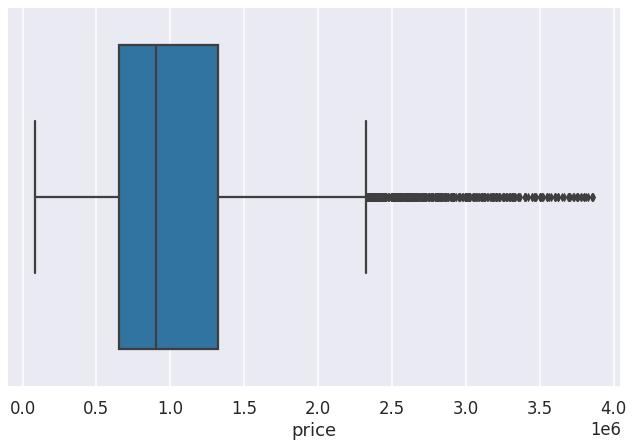

In [179]:
#El percentil .995 que me deja afuera los valores de venta de 3.9 millones para arriba
plt.figure(figsize=(11,7))
max_limit = melb_df["price"].quantile(.995)
seaborn.boxplot(x = melb_df[melb_df["price"] < max_limit]["price"])
#Sigue quedando una colita de valores fuera del quartil 3.... 

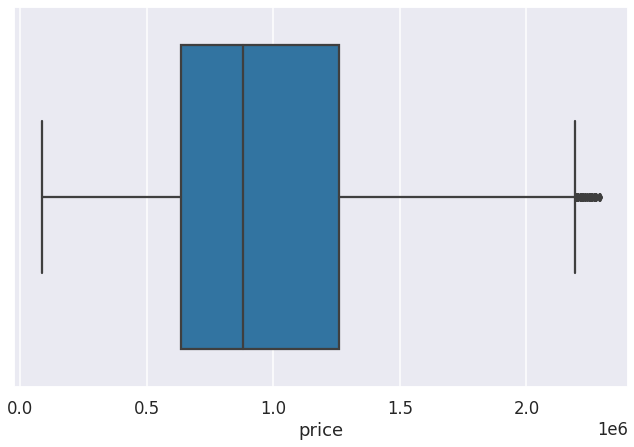

In [180]:
plt.figure(figsize=(11,7))
max_limit2 = melb_df.price.quantile(.95)
seaborn.boxplot(x = melb_df[melb_df["price"] < max_limit2]["price"])

In [181]:
# Esta es la decisión más conservadora, podemos cambiarla

melb_df = melb_df[melb_df.price < 3900000]

In [182]:
melb_df.price.quantile([.005, .01, .025, .05])

0.005    270000.0
0.010    300000.0
0.025    350000.0
0.050    405000.0
Name: price, dtype: float64

In [183]:
#PRECIOS MUY BAJOS

melb_df[melb_df.price < 270000].value_counts()
# Creo que sacaría todos los casos PI, que significa que no se llegó al precio mínimo que quería el vendedor y se vendió a un precio menor
# Aunque no estoy segura... 

date        seller         method  type  region_name            suburb          council_area   address               seller_cat  method_cat  type_cat  region_name_cat  council_area_cat  suburb_cat  postcode  lat        lng        distance  property_count  price     year_built  land_size  building_area  rooms  bedroom_2  bathroom  car
2017-12-08  Brad           S       u     Northern Metropolitan  Pascoe Vale     Moreland       4/566 Pascoe Vale Rd  28          1           2         2                23                229         3044      -37.72370  144.92232  8.5       7485            257500.0  1970.0      995.0      35.0           1      1          1         1.0    1
2016-10-09  hockingstuart  PI      u     Southern Metropolitan  Carnegie        Glen Eira      12/66 Woornack Rd     260         0           2         5                8                 63          3163      -37.89820  145.06250  11.4      7822            250000.0  1960.0      0.0        34.0           1      1          1

In [165]:
# Mmmmm.... esto nose si está bien.... si me está sacando TODAS las casas por debajo de ese valor y TODAS las PI o combina ambas cosas

# melb_df = (melb_df.price > 270000) & (melb_df.method != "PI")

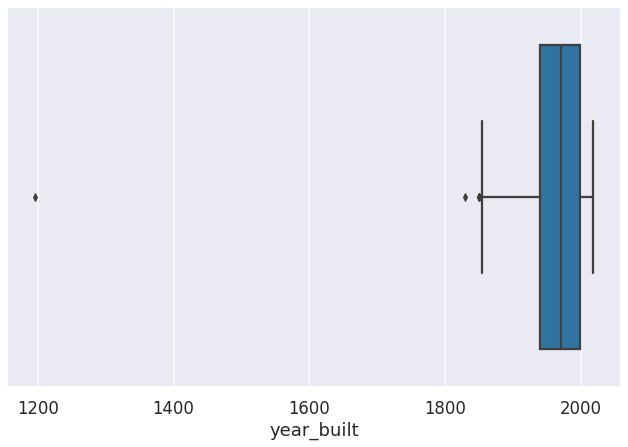

In [184]:
# YEAR BUILT
# Removí dos casas que hacían ruido en los datos, sobre todo esa del año 1200.... 
# pinta a que no es real o es algo muy antiguo y valiosos (porque se vendió en 1.2 millones)
# la de 1830 estoy en duda, parece algo real. Tiene mucho terreno y podría ser algo así como una estancia. 
# Si la sacamos el boxplot queda hermoso, pero si la dejamos quedarían dos puntitos a la izquierda.... 
plt.figure(figsize=(11,7))
seaborn.boxplot(x = melb_df.year_built)

In [185]:
melb_df[melb_df.year_built < 1850].value_counts()

date        seller   method  type  region_name            suburb          council_area  address         seller_cat  method_cat  type_cat  region_name_cat  council_area_cat  suburb_cat  postcode  lat        lng        distance  property_count  price      year_built  land_size  building_area  rooms  bedroom_2  bathroom  car
2017-06-24  McGrath  VB      h     Eastern Metropolitan   Mount Waverley  Monash        5 Armstrong St  140         4           0         0                20                207         3149      -37.86788  145.12121  14.2      13366           1200000.0  1196.0      807.0      117.0          3      3          1         4.0    1
2016-03-09  Nelson   S       u     Northern Metropolitan  Collingwood     Yarra         2/79 Oxford St  155         1           2         2                32                82          3066      -37.80420  144.98450  1.6       4553            855000.0   1830.0      2886.0     122.0          2      2          1         1.0    1
dtype: int64

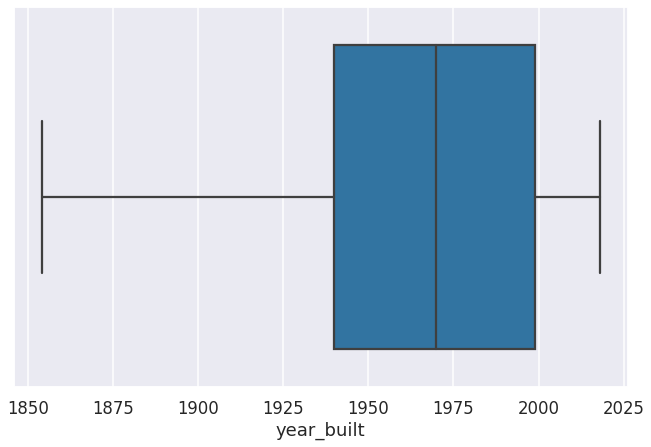

In [186]:
plt.figure(figsize=(11,7))
seaborn.boxplot(x = melb_df[melb_df["year_built"] > 1850]["year_built"])

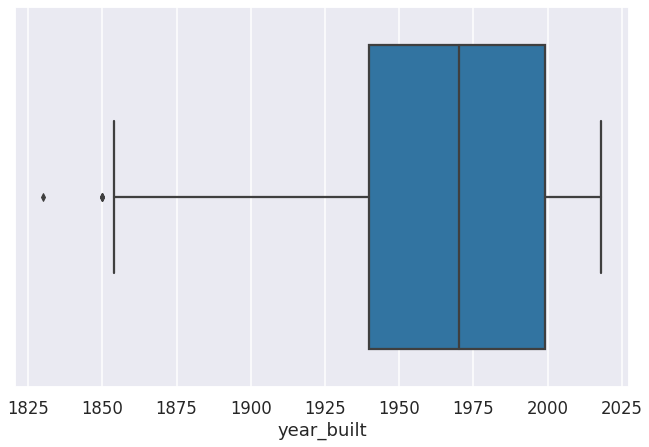

In [187]:
plt.figure(figsize=(11,7))
seaborn.boxplot(x = melb_df[melb_df["year_built"] > 1820]["year_built"])

In [188]:
# LAND SIZE y BUILDING AREA
# Yo acá haría una relación entre los dos valores. Me parece que los datos que no nos van a servir van a ser aquellos que:
# tengan un land size mucho más chico que el building area.
# Removería todos las filas que tengan NAN o NULL en ambas variables, excepto que podamos imputar la building area con cantidad de rooms y bathrooms
# El land size es imposible de imputar, por lo que vería de eliminar las filas sin ese valor (el tamaño del terreno es super importante para el precio)

melb_df["proporcion_ls_ba"] = melb_df["land_size"] / melb_df["building_area"]
melb_df["casa_terreno_proporcional"] = melb_df["proporcion_ls_ba"] >= 0.5 #En caso de que tuviéramos una casa de dos pisos sin nada de patio
melb_df.casa_terreno_proporcional.value_counts()


False    7508
True     6002
Name: casa_terreno_proporcional, dtype: int64

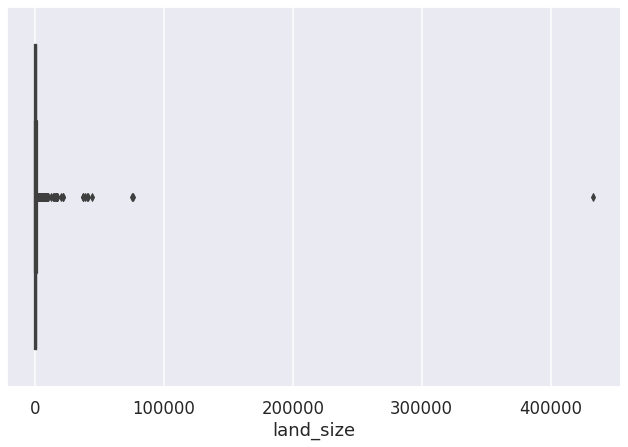

In [189]:
# LAND SIZE
plt.figure(figsize=(11,7))
seaborn.boxplot(x = melb_df.land_size)

In [192]:
melb_df.land_size.quantile([.95, .98, .995, .998])

0.950     990.000
0.980    1773.740
0.995    4698.110
0.998    9403.794
Name: land_size, dtype: float64

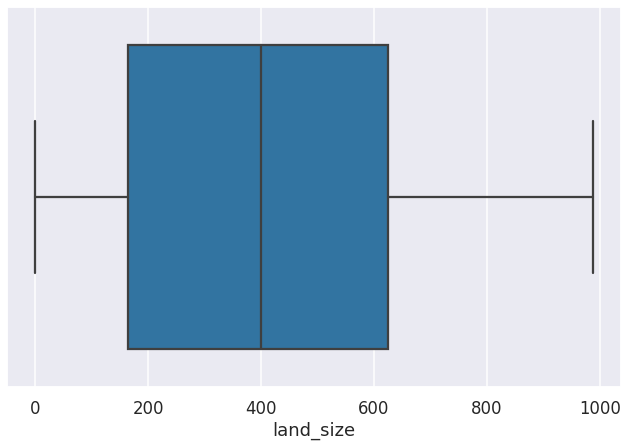

In [193]:
plt.figure(figsize=(11,7))
seaborn.boxplot(x = melb_df[melb_df["land_size"] < 990]["land_size"])

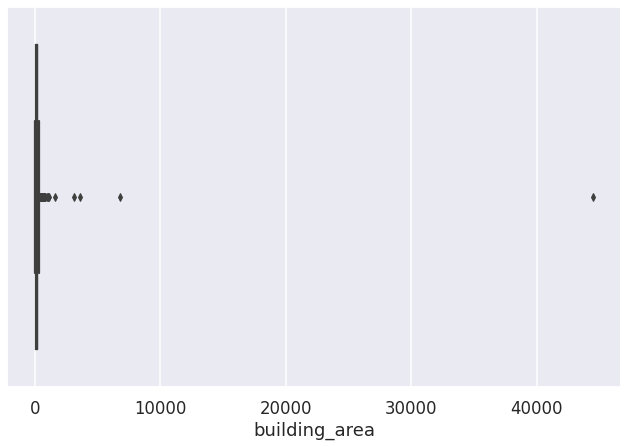

In [194]:
# BUILDING AREA
plt.figure(figsize=(11,7))
seaborn.boxplot(x = melb_df.building_area)

In [195]:
melb_df.building_area.quantile([.95, .98, .995, .998])

0.950    287.00
0.980    361.30
0.995    580.75
0.998    733.28
Name: building_area, dtype: float64

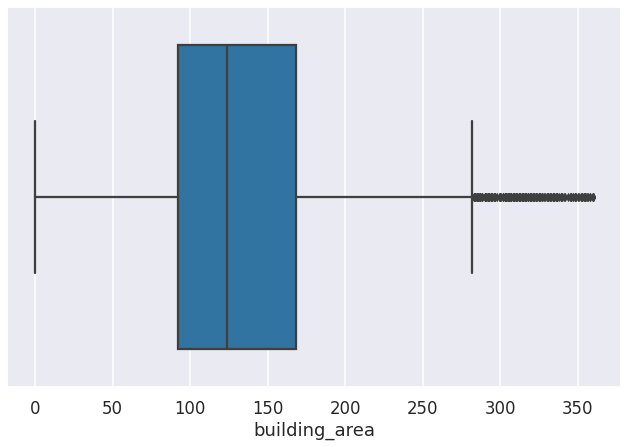

In [196]:
plt.figure(figsize=(11,7))
seaborn.boxplot(x = melb_df[melb_df["building_area"] < 361]["building_area"])

2. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
    1. Justificar cada columna no seleccionada.
    2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

In [ ]:
# Matriz de correlation de las variables numericas
corr = melb_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(12, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.tick_params(labelsize = 14)

In [ ]:
# Un postcode puede ser de varios suburbuios. En cambio, cada suburbio tiene uno y solo un postcode.
# Nos quedamos con los postcode que son más especificos
melb_df.groupby("suburb")["postcode"].nunique().max(), melb_df.groupby("postcode")["suburb"].nunique().max()

In [ ]:
# Hay 268 vendedores/inmobiliarias en todo el DataSet. De estos 268, el 66% tiene muy pocas ventas, y el 30% sólamente 1 venta
vendedores = len(melb_df.seller.unique())
vendedores_con_pocas_ventas = sum(melb_df.groupby('seller')['seller'].count() < 2)
print('Vendedores:', vendedores, '\nPorcentaje con n menor a 1:', f'{vendedores_con_pocas_ventas*100/vendedores:.2f}%')
vendedores_con_pocas_ventas = sum(melb_df.groupby('seller')['seller'].count() < 10)
print('Porcentaje con n menor a 10:', f'{vendedores_con_pocas_ventas*100/vendedores:.2f}%')

In [ ]:
drop_cols = [
    "date", # esos años tuvieron solo 2% de inflación por lo que no cambia el precio 
    #Se debe tener en cuenta que el dataset está concentrado en pocos vendedores con muchas ventas
    #, y el 66% de los vendedores tiene muy pocas ventas como para analizar
    "seller", # Por esto, no nos interesa analizar la influencia de una inmobiliaria en el precio. 
    "seller_cat", #va de la mano con seller
    "method", #Tampoco analizaremos la influencia (si existe) del método de venta en el precio final del inmueble
    "method_cat", #va de la mano con method
    
    #Consideramos que el precio de un inmueble depende mucho de su ubicación 
    #(existe una frase americana que indica, los 3 factores que más influencian son: Location, Location, Location
    #Debido a esto, utilizaremos el indicador más preciso posible respecto a la zona de ubicación del inmueble
    #En este dataset, el agrupador por zona más preciso es suburb. Por eso, dropearemos las demás columnas que dan info geográfica: 
    "region_name", 
    "region_name_cat", 
    "council_area", 
    "council_area_cat",
    "postcode",
    "address",
    "property_count", # Esto depende del suburb y la info queda repetida
    "bedroom_2", # Coincide en más de un 90% con la col "rooms" y el segundo viene de un scraper
]

cols = [c for c in melb_df.columns if c not in drop_cols]
melb_df = melb_df[cols]
melb_df.head()

In [ ]:
melb_df.groupby("type")["type"].count()

In [ ]:
melb_df.groupby("suburb")["suburb"].count().sort_values()

`type` tiene una "buena" cantidad por categoria, pero `suburb` no. Vamos a tener que agrupar

In [ ]:
#Se crea una nueva columna en la que se agruparán los suburbios con bajo "n"
melb_df['suburb_grouped'] = melb_df.suburb

In [ ]:
min_points_per_suburb = 3 #DEFINE LA MÍNIMA CANTIDAD QUE ACEPTAMOS POR SUBURBIO
suburb_to_group = melb_df.groupby("suburb_grouped")["suburb"].count().sort_values().reset_index().suburb_grouped[0] 
current_count = melb_df.groupby("suburb_grouped")["suburb"].count().sort_values().reset_index().suburb[0]

def nearest_suburb(lat_to_group, lng_to_group, original_suburb, df):
  df2 = df[df['suburb_grouped'] != original_suburb].copy()
  df2['dist'] = df2.apply(lambda row: haversine_np(lat_to_group, lng_to_group, row.lat, row.lng), axis=1)
  nearest_suburb = df2.sort_values('dist', ascending=True).suburb_grouped.values[0]
  del df2
  return nearest_suburb

while current_count < min_points_per_suburb:
  lat_to_group = melb_df[melb_df.suburb_grouped == suburb_to_group].lat.values[0]
  lng_to_group = melb_df[melb_df.suburb_grouped == suburb_to_group].lng.values[0]
  destiny_suburb = nearest_suburb(lat_to_group, lng_to_group, suburb_to_group, melb_df)
  melb_df['suburb_grouped'].replace({suburb_to_group:destiny_suburb}, inplace=True)
  print(suburb_to_group, '-->', destiny_suburb)
  suburb_to_group = melb_df.groupby("suburb_grouped")["suburb"].count().sort_values().reset_index().suburb_grouped[0] 
  current_count = melb_df.groupby("suburb_grouped")["suburb"].count().sort_values().reset_index().suburb[0]
  
melb_df.groupby("suburb_grouped")["suburb_grouped"].count().sort_values()


3. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
     1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
     2. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
     3. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

In [ ]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
    'description', 'neighborhood_overview', 'transit',
    'street', 'neighborhood', 'city', 'suburb',
    'state', 'zipcode', 'latitude', 'longitude',
    'price', 'weekly_price', 'monthly_price',
    'review_scores_location',
]
airbnb_df = pd.read_csv(
#     'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    "./data/cleansed_listings_dec18.csv",
    usecols=interesting_cols,
    low_memory=False,
)

airbnb_df.zipcode = pd.to_numeric(airbnb_df.zipcode, errors="coerce").fillna(0).astype(int)
airbnb_df.head()

In [ ]:
airbnb_df = airbnb_df[(airbnb_df.price > 0) & (airbnb_df.price < 300)]
airbnb_df.describe()

In [ ]:
suburb_melb = set(melb_df.suburb.tolist())
suburb_airbnb = set(airbnb_df.suburb.tolist())

print(f"Total de suburb en melb: {len(suburb_melb)}")
print(f"Total de suburb intersección: {len(suburb_melb.intersection(suburb_airbnb))}")
print(f"suburb que no están en airbnb: {suburb_melb.difference(suburb_airbnb)}")

In [ ]:
# Agrupo los airbnb que están a 1, 2.5 o 5 km de distancia del anuncio
# Y calculo algunos valores
# Esto toma un tiempo así anda por el mate

results = []
for i, row in melb_df.iterrows():
    if i % 100 == 0:
        print(f"\rProcesando fila: {i} de {len(melb_df)}", end="")

    airbnb_df["dist"] = haversine_np(airbnb_df.latitude, airbnb_df.longitude, row.lat, row.lng)

    result = {
        "lat": row.lat,
        "lng": row.lng,
    }

    for d in [1, 2, 2.5]:
        d = airbnb_df[airbnb_df.dist < d] \
            .agg({"dist": "count", "price": "mean", "review_scores_location": "mean"}) \
            .rename({"dist": f"count_{d}km", "price": f"price_mean_{d}km", "review_scores_location": f"review_mean_{d}km"})

        result = {**result, **d}
    results.append(result)

In [ ]:
results = pd.DataFrame(results)
results.head()

In [ ]:
melb_df = pd.merge(melb_df, results, on=["lat", "lng"])
melb_df.head()

In [ ]:
melb_df.groupby("count_1km_x")["count_1km_x"].count().sort_values()

:up: Vamos a tener que imputar algunos valores

Teniendo la lat y lng de cada casa, podemos usar la api de open streen map para buscar información relevante en la cercania de las propiedades como:
- Escuelas
- Plazas
- Supermercados

## Ejercicio 2: Imputación

1. Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).

2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.



- Imputar la cantidad de baños considerando la cantidad de habitaciones y el sub
- Imputar el tamaño del terreno segun la cantidad de habitaciones, baños y sub

## Ejercicio 3

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.